<a href="https://colab.research.google.com/github/Ricardojnf33/Modelos_Preditivos_Temperatura_Seatle-WA/blob/main/Modelos_Preditivos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperatura no dia seguinte em Seatle-WA usando Árvores de Decisão / Random Forest / GradientBooster / PLSRegression

Aluno : Ricardo Fernandes


# Importando Bibliotecas

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression

# Loading data

In [83]:
!git clone https://github.com/Ricardojnf33/Modelos_Preditivos_Temperatura_Seatle-WA.git

fatal: destination path 'Modelos_Preditivos_Temperatura_Seatle-WA' already exists and is not an empty directory.


In [84]:
temps = pd.read_csv('/content/Modelos_Preditivos_Temperatura_Seatle-WA/temps.csv')
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [85]:
temps.shape

(348, 12)

In [86]:
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [87]:
temps.year.unique()

array([2016])

# Preparação dos Dados
One-hot encode do dia da semana usando pandas get_dummies

In [88]:
temps = pd.get_dummies(temps)
temps.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### Criando Árvore de Decisão, tratando como uma série temporal
### Inicialmente usamos train_test_split para fazer o holdout

In [89]:
y = temps['actual']
X = temps.drop('actual', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

Vamos plotar os valores de treino e teste para visualizar que estaremos treinando com dados do passado e testando com dados não vistos (do 'futuro').

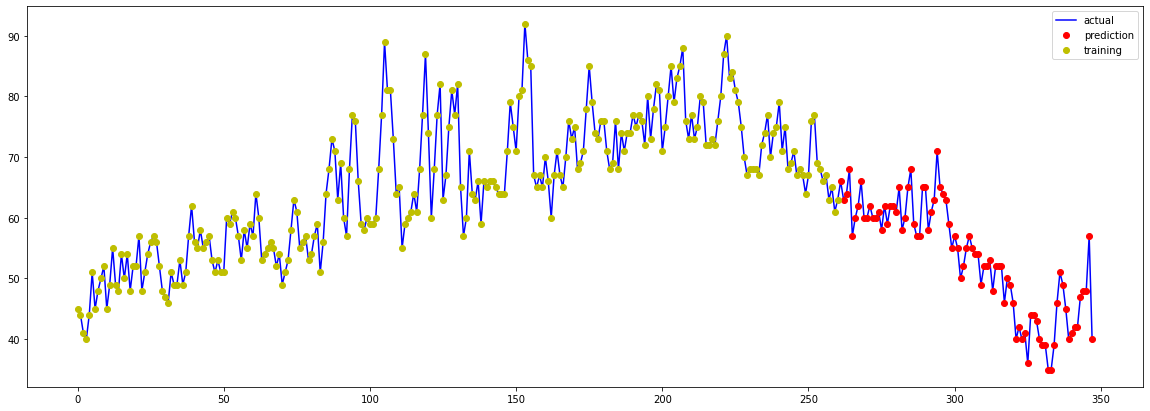

In [90]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_test, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

In [91]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

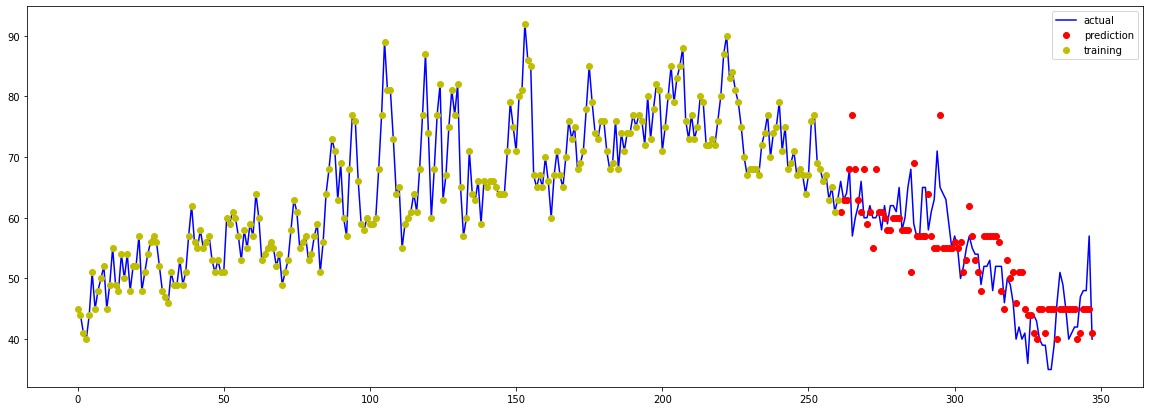

In [92]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_pred, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

In [93]:
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.67 degrees.


In [94]:
print(np.percentile(errors, 50))
print(np.percentile(errors, 90))

4.0
9.400000000000006


In [95]:
mape = 100*mean_absolute_percentage_error(y_test, y_pred)

accuracy = 100 - np.mean(mape)

print('MAPE: ', mape, '%.')
print('Accuracy:', round(accuracy, 2), '%.')

MAPE:  8.998969830968177 %.
Accuracy: 91.0 %.


In [96]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.55


## Agora, considerando como uma série temporal e usando validação cruzada

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)
tss = TimeSeriesSplit()

Vamos visualizar como o TimesSeriesSplit divide os dados a cada iteração, observando que se mantem a característica de treinar com dados passados e testar com dados futuros.

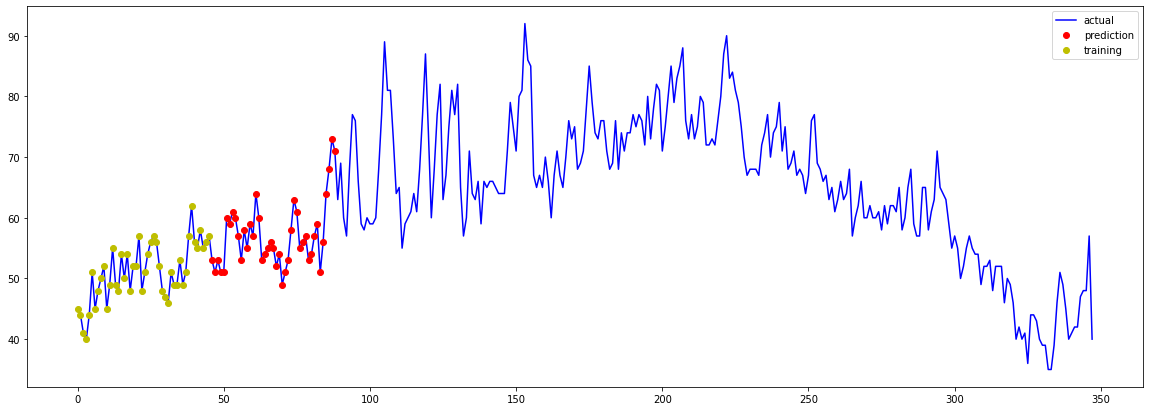

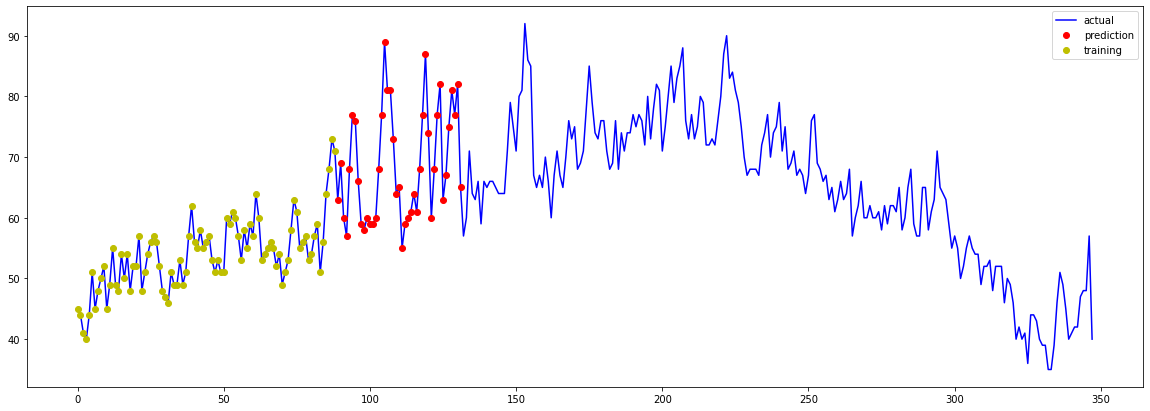

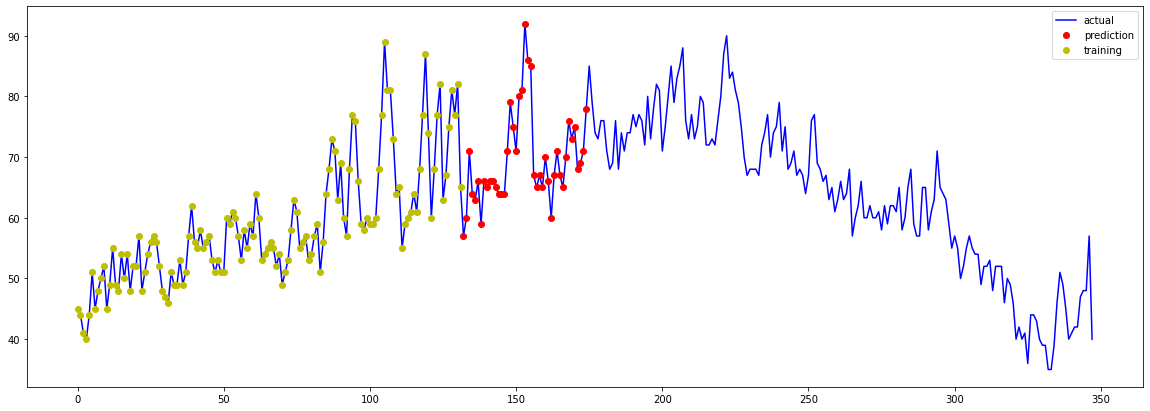

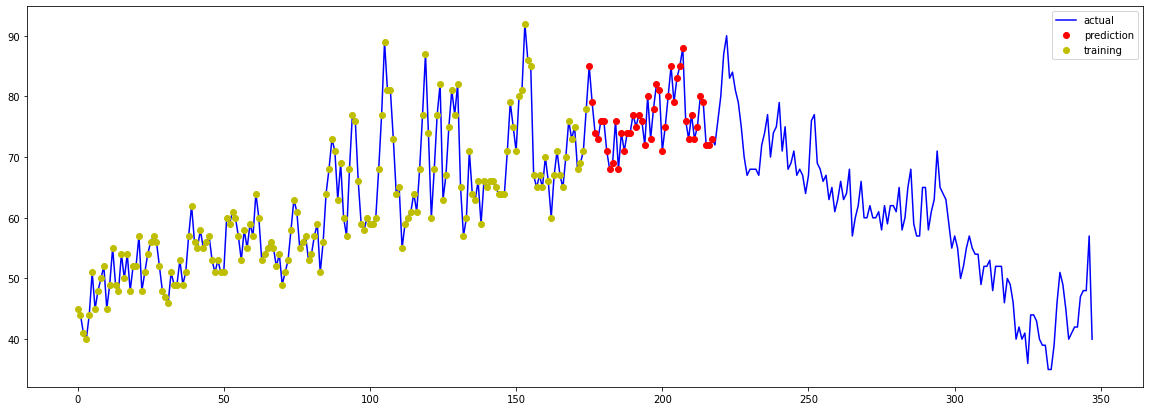

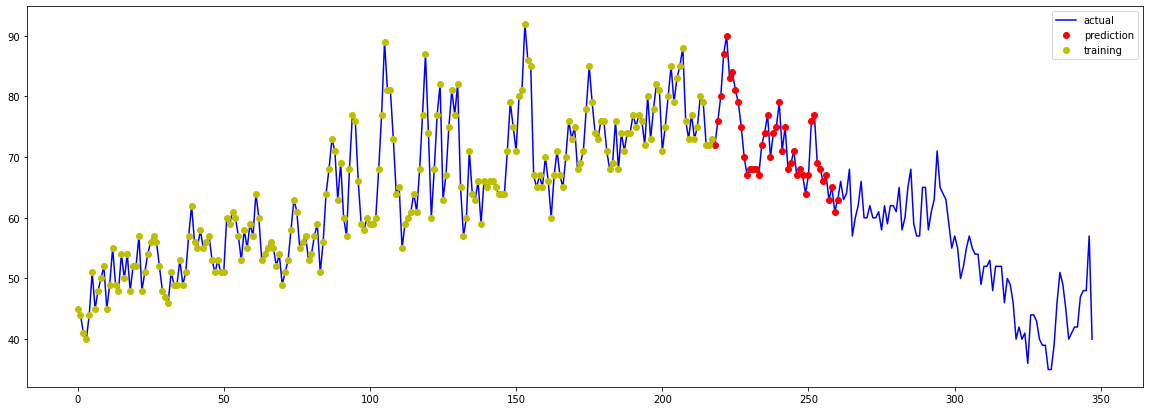

In [98]:
for train_index, test_index in tss.split(X_train):
    plt.figure(figsize=(20, 7))
    plt.plot(range(348), y, 'b-', label = 'actual')
    plt.plot(test_index, y[test_index], 'ro', label = 'prediction')
    plt.plot(train_index, y[train_index], 'yo', label = 'training')
    plt.legend()
    plt.plot()

Observe que, para a validação cruzada, passamos o TSS (TimeSeriesSplit) para o validador (cross_validate) através do parâmetro cv=tss.

In [99]:
model = tree.DecisionTreeRegressor()
scr = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
cv_results = cross_validate(model, X_train, y_train, cv=tss, scoring=scr)
cv_results

{'fit_time': array([0.00400543, 0.00409961, 0.00556564, 0.00325012, 0.00339031]),
 'score_time': array([0.00427246, 0.00316525, 0.00358725, 0.00234556, 0.00213242]),
 'test_neg_mean_absolute_error': array([-5.34883721, -8.6744186 , -7.62790698, -6.53488372, -5.41860465]),
 'test_neg_root_mean_squared_error': array([-6.42668854, -9.79439802, -9.67134343, -8.41233867, -6.75656442]),
 'test_r2': array([-0.491213  , -0.17864974, -0.7109814 , -2.23083951, -0.0442006 ])}

In [100]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_neg_root_mean_squared_error', 'test_r2'])

In [101]:
cv_results['test_neg_mean_absolute_error']

array([-5.34883721, -8.6744186 , -7.62790698, -6.53488372, -5.41860465])

In [102]:
print('MAE: ', -1*cv_results['test_neg_mean_absolute_error'].mean())
print('RMSE: ', -1*cv_results['test_neg_root_mean_squared_error'].mean())

MAE:  6.720930232558139
RMSE:  8.212266615467257


Após a validação cruzada, quando já temos os resultados médios, retreinamos o modelo com todos os dados de treinamento e testamos nos dados de treino e teste. 

In [103]:
y_train_pred = model.fit(X_train, y_train).predict(X_test)

In [104]:
mae = mean_absolute_error(y_test, y_train_pred)
mse = mean_squared_error(y_test, y_train_pred)
rmse = mean_squared_error(y_test, y_train_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_test, y_train_pred)
r2 = r2_score(y_test, y_train_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 4.344827586206897
MSE: 31.67816091954023
RMSE: 5.628335537220594
MAPE:  8.431895579744845 %.
Variance score: 0.62


Este resultado em treinamento pode ser considerado dentro da normalidade de árvores de decisão, porém mostram que o modelo se adaptou completamente aos dados, o que, sabemos, pode não ser bom.

Vamos verificar então os resultados na base de testes

In [105]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 4.666666666666667
MSE: 37.67816091954023
RMSE: 6.138253898262945
MAPE:  8.998969830968177 %.
Variance score: 0.55


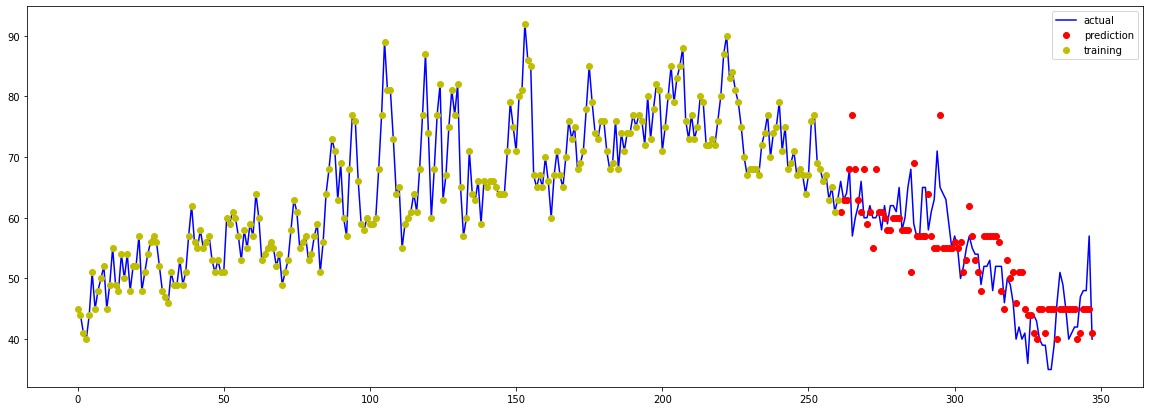

In [106]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_pred, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

## Vamos testar variações na árvore de decisão para verificar se conseguimos melhorar os resultados.

Sempre ressaltando que estaremos olhando para os resultados da validação cruzada para melhorar o nosso modelo. Não para os resultados em teste.
Nós queremos que os resultados em teste estejam compatíveis com os resultados da validação cruzada. 

Para isto, usaremos 2 ferramentas importantes do sklearn: Pipeline e GridSearchCV.

Pipeline executa um pipeline de dados, um fluxo de dados que pode ir da captura aos resultados, passando por todas as etapas. Aqui executaremos apenas a modelagem.

GridSearchCV executa a validação cruzada ao mesmo tempo que busca por melhores parâmetros do modelo, o que é chamado de hiperparametrização.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [108]:
search_paramns = [{
    'tree__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'tree__splitter': ['best', 'random'],
    'tree__max_features': ['auto', 'sqrt', 'log2'],
    'tree__max_depth': [None, 2, 3, 5]}]

pipe = Pipeline([
    ('tree', tree.DecisionTreeRegressor())])

tss = TimeSeriesSplit()

search = GridSearchCV(estimator=pipe,
                     param_grid=search_paramns,
                     cv=tss,
                     scoring='neg_root_mean_squared_error')

### Treinando e calibrando hiperparâmetros do modelo

In [109]:
%%time
search.fit(X_train, y_train)

CPU times: user 2.76 s, sys: 24 ms, total: 2.79 s
Wall time: 2.8 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('tree', DecisionTreeRegressor())]),
             param_grid=[{'tree__criterion': ['squared_error', 'friedman_mse',
                                              'absolute_error', 'poisson'],
                          'tree__max_depth': [None, 2, 3, 5],
                          'tree__max_features': ['auto', 'sqrt', 'log2'],
                          'tree__splitter': ['best', 'random']}],
             scoring='neg_root_mean_squared_error')

In [110]:
search.cv_results_

{'mean_fit_time': array([0.00459847, 0.00281839, 0.00375342, 0.00307417, 0.00295129,
        0.00243168, 0.00240049, 0.00227723, 0.00229368, 0.00417566,
        0.00238185, 0.00223551, 0.00255322, 0.00238338, 0.00232806,
        0.00233407, 0.00239701, 0.00260172, 0.0028183 , 0.00255799,
        0.00245056, 0.0024323 , 0.00245237, 0.00235181, 0.00310888,
        0.0027164 , 0.00251708, 0.00242534, 0.00272298, 0.00294614,
        0.00258002, 0.00283737, 0.00324421, 0.0026268 , 0.00277634,
        0.00238576, 0.00390716, 0.00241375, 0.00273762, 0.00231609,
        0.00234337, 0.00257673, 0.00313001, 0.00452456, 0.00262508,
        0.00271626, 0.00298815, 0.00255866, 0.00729985, 0.00616546,
        0.00439429, 0.00379262, 0.00467691, 0.00373583, 0.00394597,
        0.00436945, 0.00289865, 0.00266776, 0.00286245, 0.00299211,
        0.00440397, 0.00395598, 0.0050252 , 0.00306382, 0.00310807,
        0.00282393, 0.00570693, 0.0046217 , 0.00360298, 0.00323892,
        0.003265  , 0.00333562,

In [111]:
search.cv_results_.get('mean_test_score')

array([ -9.04106349,  -8.49486209,  -9.09273371,  -9.49500057,
        -8.18670517, -11.51755972,  -6.44739812,  -7.29246778,
        -7.00674741,  -7.65220091,  -8.17805577,  -8.48204171,
        -6.72714329,  -7.44953024,  -7.54734777,  -7.85590961,
        -7.71630908,  -7.21171073,  -8.15043454,  -7.87355288,
        -7.65785623,  -8.7006746 ,  -8.01429574,  -8.96283189,
        -8.7731033 ,  -8.66994812,  -8.71999636,  -9.7442333 ,
        -8.34536705,  -8.44338512,  -6.44739812,  -7.85024825,
        -7.62319957,  -7.73220789,  -7.76739127,  -7.98239032,
        -6.72714329,  -6.97971341,  -8.0654679 ,  -7.24640792,
        -8.47522012,  -7.0855295 ,  -8.00373   ,  -7.7531761 ,
        -8.26989852,  -9.0062947 ,  -7.48592053,  -7.5417298 ,
        -8.95428802,  -9.1687786 ,  -8.59628595,  -8.3949572 ,
        -9.26122532,  -8.59848044,  -6.49686777,  -7.38888938,
        -7.13848777,  -8.30378748,  -8.86923731, -10.21403694,
        -7.62668963,  -7.29516315,  -7.94148213,  -8.10

In [112]:
search.best_params_

{'tree__criterion': 'squared_error',
 'tree__max_depth': 2,
 'tree__max_features': 'auto',
 'tree__splitter': 'best'}

### Visualizando os resultados e avaliando o modelo

O GridSearchCV já nos fornece o melhor modelo alcançado, treinado em toda a base de treinamento (X_train), para que possamos utilizar.

In [113]:
y_train_pred = search.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 4.24488658981474
MSE: 26.771655748108856
RMSE: 5.174133333043212
MAPE:  6.651494697233167 %.
Variance score: 0.77


In [114]:
y_pred = search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 7.212909511630741
MSE: 80.25417897395941
RMSE: 8.95846967812915
MAPE:  15.443702660559067 %.
Variance score: 0.01


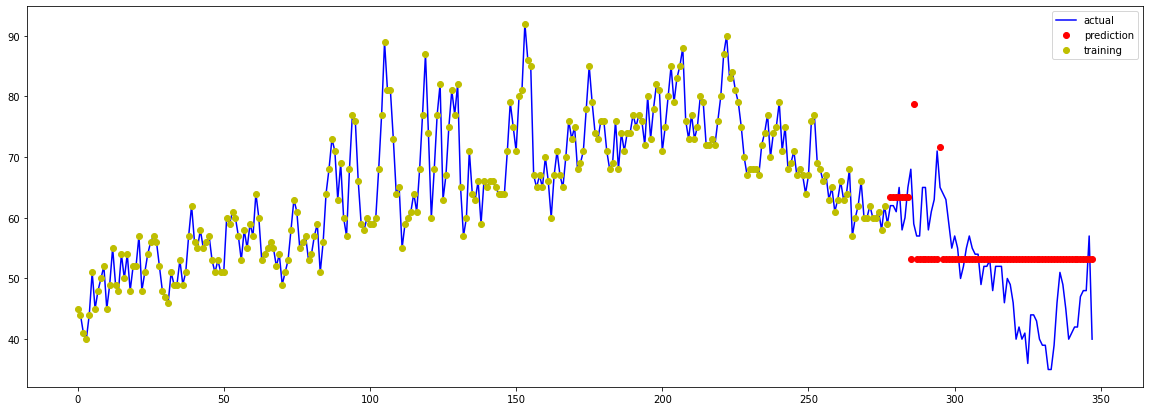

In [115]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_pred, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

[Text(0.5509805484693877, 0.9705882352941176, 'X[4] <= 66.5\nsquared_error = 114.872\nsamples = 278\nvalue = 65.32'),
 Text(0.26496207035445757, 0.9117647058823529, 'X[5] <= 55.55\nsquared_error = 45.412\nsamples = 148\nvalue = 57.514'),
 Text(0.12625872717508055, 0.8529411764705882, 'X[5] <= 49.25\nsquared_error = 23.698\nsamples = 85\nvalue = 53.176'),
 Text(0.04430719656283566, 0.7941176470588235, 'X[5] <= 46.05\nsquared_error = 17.036\nsamples = 38\nvalue = 49.737'),
 Text(0.017185821697099892, 0.7352941176470589, 'X[11] <= 0.5\nsquared_error = 3.76\nsamples = 5\nvalue = 42.8'),
 Text(0.01288936627282492, 0.6764705882352942, 'X[13] <= 0.5\nsquared_error = 2.25\nsamples = 4\nvalue = 43.5'),
 Text(0.008592910848549946, 0.6176470588235294, 'X[2] <= 1.5\nsquared_error = 0.222\nsamples = 3\nvalue = 44.333'),
 Text(0.004296455424274973, 0.5588235294117647, 'squared_error = 0.0\nsamples = 1\nvalue = 45.0'),
 Text(0.01288936627282492, 0.5588235294117647, 'squared_error = 0.0\nsamples = 2\n

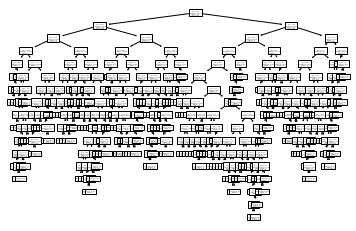

In [116]:
model = tree.DecisionTreeClassifier() # Cria árvore para classificação
model = tree.DecisionTreeRegressor() # Cria árvore para regressão

model.fit(X_train,y_train) # Cria a árvore baseada nos dados de treinamento
predictions = model.predict(X_test) # Prediz a saída dos dados de teste
tree.plot_tree(model) # Plota a árvore de 


## Conclusão

Note como o modelo foi ruim na base de testes, desvinculando-se totalmente dos resultados da validação.
Isto mostra que saímos de um modelo que sofria de overfitting para um modelo que sobre de underfitting, simplificando demais o aprendizado, o que provavelmente ocorreu pelo modelo ter poucos dados abaixo da temperatura de aproximadamente 55.

Neste momento, indica-se a utilização de modelos mais complexos, como o RandomForests e o GBDT. 

## Iniciando RandomForest

In [117]:
np.random.seed(0)

In [118]:
temps = pd.read_csv('/content/Modelos_Preditivos_Temperatura_Seatle-WA/temps.csv')
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


## GridSearchCV para verificar melhores parâmetros

In [119]:
search_paramns = [{
    'max_depth': [5,15,50,100,50],
    'min_samples_split': [2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [None, 2, 3, 4]}]

#tss = TimeSeriesSplit()

search = GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=search_paramns,
                     cv=5,
                     scoring='neg_root_mean_squared_error')

In [120]:
%%time
search.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 1.01 s, total: 2min 29s
Wall time: 2min 31s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 15, 50, 100, 50],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [None, 2, 3, 4],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='neg_root_mean_squared_error')

In [121]:
search.cv_results_

{'mean_fit_time': array([0.04009662, 0.04123802, 0.03939161, 0.0414741 , 0.15620346,
        0.15095034, 0.14867582, 0.14877076, 0.14951086, 0.15054383,
        0.16315875, 0.15967946, 0.14602671, 0.14954391, 0.15181665,
        0.15399137, 0.03878059, 0.0374537 , 0.03749185, 0.04062014,
        0.12179885, 0.12097278, 0.12154107, 0.1258925 , 0.12465382,
        0.12517223, 0.12672725, 0.12285371, 0.11755095, 0.1210041 ,
        0.12648468, 0.12708092, 0.03989701, 0.03621888, 0.03889279,
        0.03671846, 0.12297568, 0.12372146, 0.12720938, 0.12309399,
        0.12019811, 0.11977644, 0.12281709, 0.12288375, 0.12394295,
        0.12695351, 0.12083321, 0.12378306, 0.03800082, 0.03712897,
        0.04002051, 0.03962126, 0.17525334, 0.173879  , 0.17618575,
        0.16618428, 0.16102166, 0.161127  , 0.16387   , 0.16451626,
        0.15655136, 0.15564551, 0.15908656, 0.15620632, 0.03858314,
        0.03939915, 0.03825097, 0.03886166, 0.12665086, 0.13034306,
        0.13160248, 0.13066998,

In [122]:
search.cv_results_.get('mean_test_score')

array([        nan,         nan,         nan,         nan, -6.22598194,
       -6.22290733, -6.28185319, -6.20405083, -6.24135217, -6.20000831,
       -6.14249925, -6.22232098, -6.07713903, -6.0586762 , -6.14932369,
       -6.18147306,         nan,         nan,         nan,         nan,
       -6.271072  , -6.16851959, -6.13589433, -6.15406562, -6.17484139,
       -6.15284557, -6.01536416, -6.21495408, -6.17023708, -6.16661727,
       -6.09001477, -6.12302093,         nan,         nan,         nan,
               nan, -6.19390942, -6.14475292, -6.13435702, -6.22329253,
       -6.12510455, -6.15756418, -6.21680511, -6.15263977, -6.04860279,
       -6.08327847, -6.18317654, -6.07112115,         nan,         nan,
               nan,         nan, -6.23899955, -6.22732179, -6.16482676,
       -6.2765733 , -6.21804072, -6.16810537, -6.05526025, -6.25173918,
       -6.11590076, -6.10899657, -6.08990678, -6.13230741,         nan,
               nan,         nan,         nan, -6.06793263, -6.02

## Resultado de melhores parâmetros

In [123]:
search.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [124]:
y_train_pred = search.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 2.8722728867603826
MSE: 13.541679591332244
RMSE: 3.679902117085758
MAPE:  4.384709438848283 %.
Variance score: 0.88


In [125]:
y_pred = search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 4.99222419794197
MSE: 41.005460018580386
RMSE: 6.403550579060057
MAPE:  10.98402451873959 %.
Variance score: 0.49


## Aplicação do RandomForestRegressor com melhores parâmetros

In [126]:
reg = RandomForestRegressor(max_depth= 15,
 max_features= 'log2',
 min_samples_leaf= 4,
 min_samples_split= 3)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

In [128]:
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', min_samples_leaf=4,
                      min_samples_split=3)

In [129]:
tempPredict =  reg.predict(X_test)

## Score RandomForest com melhores parâmetros

In [130]:
reg.score(X_test, y_test)

0.544405680293693

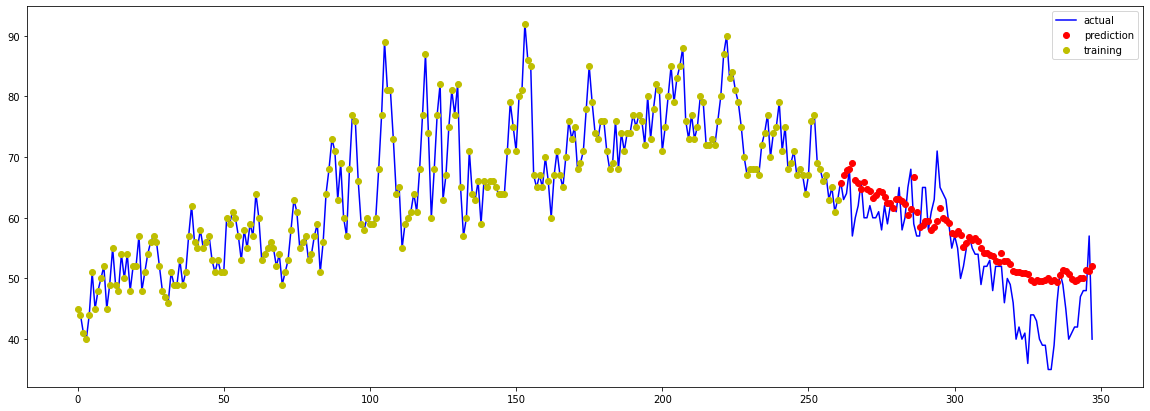

In [131]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, tempPredict, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

## Observamos pelo gráfico uma predição relativamente baixa, visto o score ser também baixo.

## Iniciando o GradientBooster para verificar melhor performance

## Score GradientBooster sem GridSearchCV

In [132]:
reg = GradientBoostingRegressor(random_state=0)
 
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

reg.score(X_test, y_test)

0.6456797765929827

## Iniciando GradientBooster com GridSearchCV para obter melhores parâmetros




In [133]:
search_paramns = [{
    'max_depth': [5,15,50,100,500], #5,15,50,100,500
    'min_samples_split': [2,3,4,5], #2,3,4,5
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [None, 2, 3, 4]}] #None, 2, 3, 4

#tss = TimeSeriesSplit()

search = GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid=search_paramns,
                     cv=5,
                     scoring='neg_root_mean_squared_error')

In [134]:
%%time
search.fit(X_train, y_train)

CPU times: user 1min 14s, sys: 156 ms, total: 1min 14s
Wall time: 1min 14s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    t

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_depth': [5, 15, 50, 100, 500],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [None, 2, 3, 4],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='neg_root_mean_squared_error')

In [135]:
search.cv_results_

{'mean_fit_time': array([0.0030036 , 0.00221953, 0.00224638, 0.00217562, 0.08492141,
        0.09099269, 0.08598261, 0.08458385, 0.08494601, 0.08072701,
        0.08119826, 0.0810173 , 0.07918324, 0.07895074, 0.07843719,
        0.0797503 , 0.00223112, 0.00214667, 0.00213776, 0.00217886,
        0.04235096, 0.04335856, 0.04255395, 0.04254317, 0.04108186,
        0.03945484, 0.03951259, 0.04174666, 0.04012575, 0.03969865,
        0.03850312, 0.03970833, 0.00228519, 0.00213752, 0.00237408,
        0.00214262, 0.04385648, 0.04107647, 0.03964238, 0.04146485,
        0.04141955, 0.04507837, 0.04075751, 0.0417305 , 0.04138055,
        0.04257379, 0.03959379, 0.04030571, 0.00222621, 0.00218263,
        0.00212727, 0.0021596 , 0.14112244, 0.13846545, 0.14335847,
        0.14616375, 0.13432183, 0.1331419 , 0.12842631, 0.12851562,
        0.12046137, 0.12244663, 0.1209909 , 0.12577586, 0.00271173,
        0.00308313, 0.00289259, 0.00277371, 0.06149807, 0.06496167,
        0.05786142, 0.05642691,

In [136]:
search.cv_results_.get('mean_test_score')

array([        nan,         nan,         nan,         nan, -6.42978651,
       -6.54679868, -6.62120588, -6.71271831, -6.54704429, -6.56743813,
       -6.56124558, -6.53824641, -6.53694019, -6.53811772, -6.54283041,
       -6.51328605,         nan,         nan,         nan,         nan,
       -6.77792502, -6.73342544, -6.61261246, -6.61551954, -6.57244031,
       -6.58425774, -6.69021157, -6.58338929, -6.61574164, -6.73528858,
       -6.83356907, -6.75576542,         nan,         nan,         nan,
               nan, -6.54842061, -6.43703797, -7.09134814, -6.80643507,
       -6.55236661, -6.7657729 , -6.76904441, -6.59863384, -6.69128944,
       -6.68587279, -6.68201173, -6.7025117 ,         nan,         nan,
               nan,         nan, -6.77420938, -6.87081915, -6.74433779,
       -6.64538809, -6.48261278, -6.50425069, -6.53600607, -6.47331837,
       -6.61114782, -6.53333039, -6.55880866, -6.58911787,         nan,
               nan,         nan,         nan, -6.67052219, -6.47

## Obtenção dos melhores parâmetros GridSearchCV

In [137]:
search.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [138]:
y_train_pred = search.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 0.03986310443524073
MSE: 0.0046282548300261486
RMSE: 0.06803127832127034
MAPE:  0.059880553317738394 %.
Variance score: 1.00


In [139]:
y_pred = search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 5.102039587337142
MSE: 40.88472273680658
RMSE: 6.394116259250107
MAPE:  10.825974676584854 %.
Variance score: 0.51


### Iniciando GradientBooster com melhores parâmetros

In [140]:
reg = GradientBoostingRegressor(max_depth= 100,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 3)

In [141]:
reg.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=100, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=3)

In [142]:
tempPredictGBDT = reg.predict(X_test)

## Score GradientBooster com melhores parâmetros

In [143]:
reg.score(X_test, y_test)

0.644983542899833

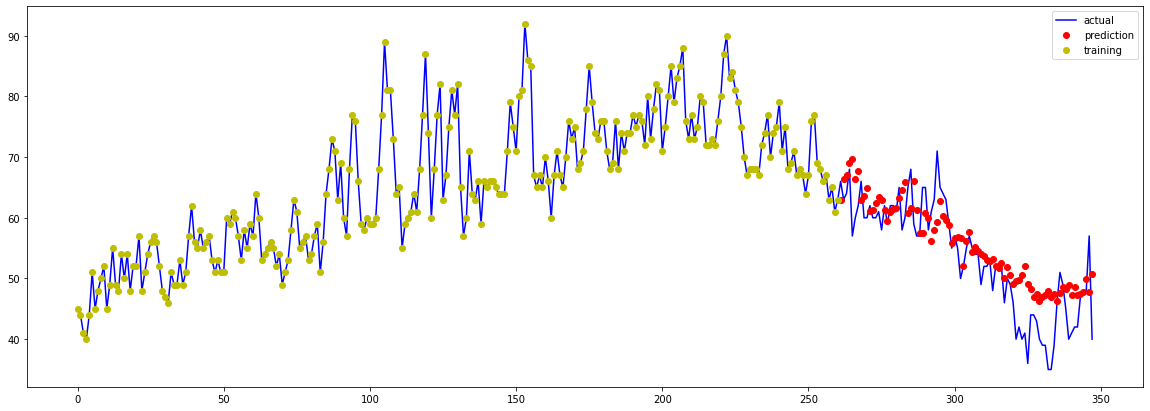

In [144]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test.index, tempPredictGBDT, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

## Observamos pelo gráfico uma predição relativamente baixa, visto o score ser também baixo. O RandomForest apresentou leve melhora na predição.

## Iniciando o modelo PLSRegression 

Score inicial 0,58 sem o GridSearchCV

In [145]:
np.random.seed(0)

In [146]:
regPLS = PLSRegression(n_components=2)
 
regPLS.fit(X_train, y_train)

regPLS.score(X_test, y_test)

0.5854313123922521

In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, shuffle=False)

## Iniciando GridSearchCV para obter os melhores parâmetros

In [148]:
search_paramns = [{
    'n_components': [1, 2, 3, 4],
    'max_iter': [500, 700],
    'tol': [1e-01, 1e-02,1e-06]}]

#pipe = Pipeline([
    #('tree', tree.DecisionTreeRegressor())])

#tss = TimeSeriesSplit()

search = GridSearchCV(estimator=PLSRegression(),
                     param_grid=search_paramns,cv=5, scoring='neg_root_mean_squared_error')

In [149]:
%%time
search.fit(X_train2, y_train2)

CPU times: user 780 ms, sys: 4.05 ms, total: 784 ms
Wall time: 795 ms


GridSearchCV(cv=5, estimator=PLSRegression(),
             param_grid=[{'max_iter': [500, 700], 'n_components': [1, 2, 3, 4],
                          'tol': [0.1, 0.01, 1e-06]}],
             scoring='neg_root_mean_squared_error')

In [150]:
search.cv_results_

{'mean_fit_time': array([0.00525408, 0.00449605, 0.00306969, 0.00327415, 0.00315762,
        0.00351362, 0.00458975, 0.00390139, 0.00331292, 0.00332332,
        0.00336027, 0.0057323 , 0.00415363, 0.00297761, 0.003828  ,
        0.00352049, 0.00497193, 0.00345573, 0.00338287, 0.00349083,
        0.00386634, 0.00359292, 0.00346112, 0.00344219]),
 'mean_score_time': array([0.00285478, 0.00285354, 0.00190148, 0.00195665, 0.00189376,
        0.00205927, 0.00280581, 0.00191784, 0.00185671, 0.00173888,
        0.00195155, 0.002355  , 0.00221839, 0.0018436 , 0.00247455,
        0.00221581, 0.0026206 , 0.00211673, 0.00194473, 0.00192304,
        0.00210123, 0.00187831, 0.00192738, 0.00230556]),
 'mean_test_score': array([-5.93926218, -5.93926218, -5.93926218, -5.78964372, -5.78964372,
        -5.78964372, -5.29418888, -5.29418888, -5.29418888, -5.11045884,
        -5.11045884, -5.11045884, -5.93926218, -5.93926218, -5.93926218,
        -5.78964372, -5.78964372, -5.78964372, -5.29418888, -5.294

In [151]:
search.cv_results_.get('mean_test_score')

array([-5.93926218, -5.93926218, -5.93926218, -5.78964372, -5.78964372,
       -5.78964372, -5.29418888, -5.29418888, -5.29418888, -5.11045884,
       -5.11045884, -5.11045884, -5.93926218, -5.93926218, -5.93926218,
       -5.78964372, -5.78964372, -5.78964372, -5.29418888, -5.29418888,
       -5.29418888, -5.11045884, -5.11045884, -5.11045884])

## Melhores parâmetros do GridSearchCV

In [152]:
search.best_params_

{'max_iter': 500, 'n_components': 4, 'tol': 0.1}

In [153]:
y_train_pred_PLS = search.predict(X_train2)

mae = mean_absolute_error(y_train2, y_train_pred_PLS)
mse = mean_squared_error(y_train, y_train_pred_PLS)
rmse = mean_squared_error(y_train2, y_train_pred_PLS, squared=False)
mape = 100*mean_absolute_percentage_error(y_train2, y_train_pred_PLS)
r2 = r2_score(y_train, y_train_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 3.656579425774265
MSE: 22.33156307456026
RMSE: 4.725628325901251
MAPE:  5.6056516922858135 %.
Variance score: 1.00


In [154]:
y_pred2 = search.predict(X_test2)

mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
mape = 100*mean_absolute_percentage_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE: ', mape, '%.')
print('Variance score: %.2f' % r2)

MAE: 3.9932359260898265
MSE: 38.89323723265152
RMSE: 6.236444278004216
MAPE:  7.429358966885546 %.
Variance score: 0.53


In [155]:
regPLS = PLSRegression(max_iter= 500, n_components= 4, tol=0.1)

In [156]:
regPLS.fit(X_train2,y_train2)

PLSRegression(n_components=4, tol=0.1)

In [157]:
tempPredictPLS = regPLS.predict(X_test2)

In [158]:
regPLS.score(X_test, y_test)

0.5314552586791821

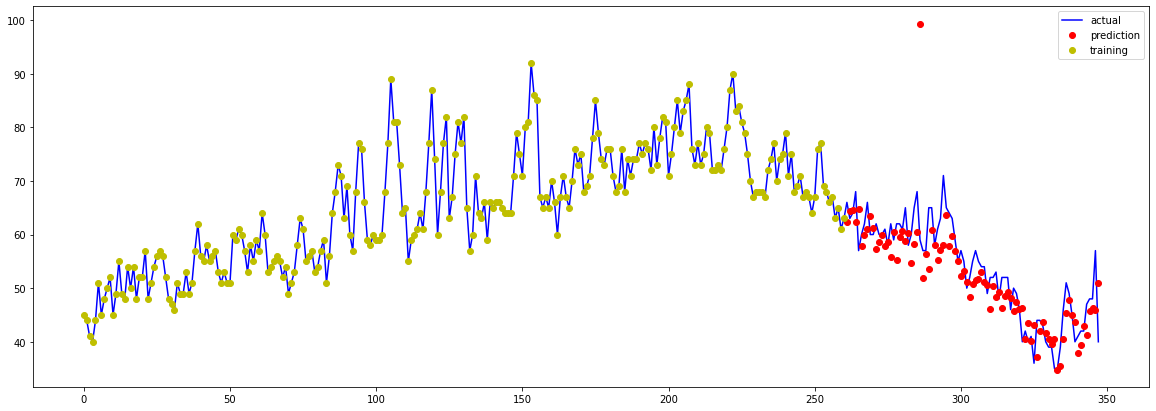

In [159]:
plt.figure(figsize=(20, 7))
plt.plot(range(348), y, 'b-', label = 'actual')
plt.plot(y_test2.index, tempPredictPLS, 'ro', label = 'prediction')
plt.plot(y_train2.index, y_train2, 'yo', label = 'training')
plt.legend()

## Apesar do outlier, observamos que a distribuição da predição com o PLSRegression é mais fidedigno com a reta "Actual".

## Conclusão

Observamos que após os 4 modelos, o randomForest apresentou o melhor resultado, após obtenção dos melhores parâmetros com o GridSearchCV.
Com o score de 0.54